# STAT186: partisanship

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [2]:
os.listdir('../data/')

['.DS_Store',
 'crime_cat.csv',
 'pci-index-release.xlsx',
 'stat186-projdata-2.csv',
 'states-codes-capitals.csv',
 'states-codes-supcourt-city.csv',
 'weather']

In [3]:
data = pd.read_csv('../data/stat186-projdata-2.csv', index_col = 0, low_memory=False)

In [4]:
data.shape

(171409, 341)

In [82]:
data.head(2)

,masterid,id_1,coder,coderid,casen_1,juris,first_ct,agency,agency_r,arbitrat,...,brthyr,race,gender,pajid,jpid,agedec,EWI,select,retentn,cj
0,95.010009765625,102,TEB,1130,1.0,2.0,1.0,0.0,88.0,0.0,...,1929.0,1.0,1.0,47.23,1.0,66.0,-1.454818,5.0,5.0,0.0
1,95.01001739501953,103,TEB,1130,2.0,2.0,2.0,0.0,88.0,0.0,...,1930.0,1.0,1.0,26.20,1.0,65.0,-1.454818,5.0,5.0,0.0


In [5]:
data[['decs_day', 'decs_mo', 'decs_yr']] = data[['decs_day', 'decs_mo', 'decs_yr']].fillna(0)

In [6]:
data['date'] = data['decs_day'].astype(int).astype(str) + '/' + data['decs_mo'].astype(int).astype(str) + '/' + data['decs_yr'].astype(int).astype(str)
data['date'] = pd.to_datetime(data['date'], format = '%d/%m/%Y', errors = 'coerce')
data.drop(['decs_day', 'decs_mo', 'decs_yr'], axis = 1, inplace = True)

In [7]:
judge_vars=['judgecode', 'brthyr','race', 'gender','pajid','jpid', 'agedec', 'EWI', 'select', 'retentn', 'cj']

In [8]:
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month

In [11]:
data = pd.merge(data, partisan_conflict, on = ['Year', 'Month'])

In [10]:
partisan_conflict = pd.read_excel('../data/pci-index-release.xlsx') #, index_col = 0)
partisan_conflict = partisan_conflict[(partisan_conflict['Year'] > 1994) & (partisan_conflict['Year'] < 1999)]
partisan_conflict['Month'] = [i % 12 + 1 for i in range(len(partisan_conflict))]
partisan_conflict.head()

,Year,Month,Partisan Conflict
168,1995,1,98.571354
169,1995,2,113.222627
170,1995,3,106.517444
171,1995,4,102.515948
172,1995,5,111.965461


## Overall probability to write a dissenting opinion over time

In [671]:
ncases = []
dates = []
for year in [1995, 1996, 1997, 1998]:
    for m in range(1, 13):
        pre_pres = data[(data['date'].dt.month == m) & (data['date'].dt.year == year)]
        d = pre_pres.groupby('masterid').apply(lambda x : 6.0 in x['judgeopinion'].unique())
        date = str(m) + '/' + str(year)
        ncases.append(len(d))                                                                               
        dates.append(date) 

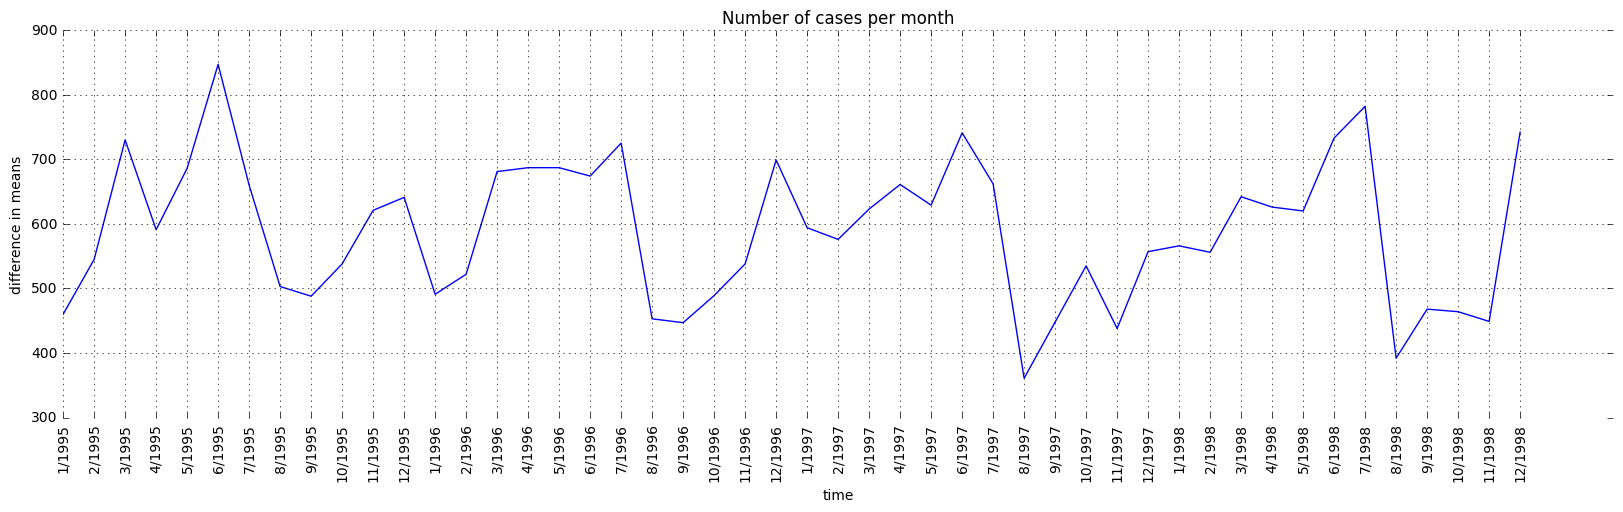

In [673]:
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(20, 5))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.plot(ncases)

ax.set_xticks(np.arange(0, len(dates), step=1))
ax.set_xlabel('time')
ax.set_ylabel('difference in means')
ax.set_xticklabels(dates, rotation=90)
plt.grid(b=None, which='major', axis='both')
plt.title('Number of cases per month')

In [681]:
p_dissent_write = []
p_dissent = []
dates = []
for year in [1995, 1996, 1997, 1998]:
    for m in range(1, 13):
        pre_pres = data[(data['date'].dt.month == m) & (data['date'].dt.year == year)]
        d = pre_pres.groupby('masterid').apply(lambda x : 6.0 in x['judgeopinion'].unique())
        p_dissent_write.append(len(d[d])/ len(d)) 
        
        d = pre_pres.groupby('masterid').apply(lambda x : 8.0 in x['judgeopinion'].unique())
        p_dissent.append(len(d[d])/ len(d)) 
        
        date = str(m) + '/' + str(year)
        dates.append(date) 

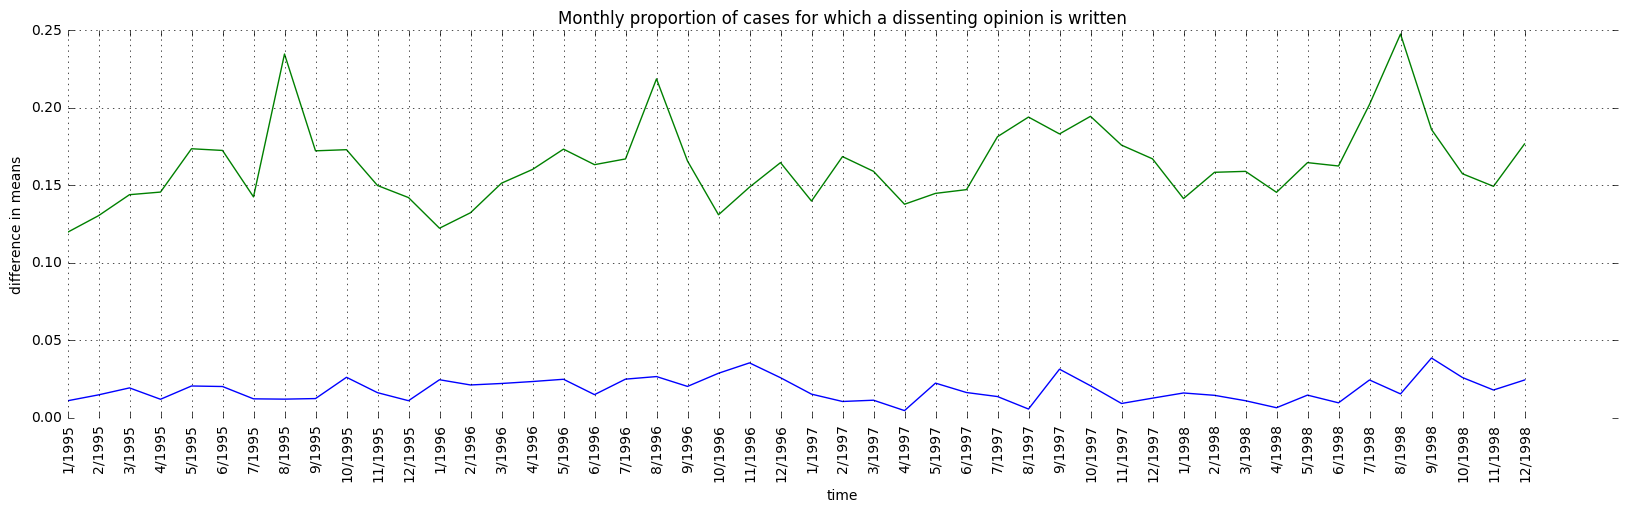

In [679]:
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(20, 5))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.plot(p_dissent)
ax.plot(p_dissent_write)

ax.set_xticks(np.arange(0, len(dates), step=1))
ax.set_xlabel('time')
ax.set_ylabel('difference in means')
ax.set_xticklabels(dates, rotation=90)
plt.grid(b=None, which='major', axis='both')
plt.title('Monthly proportion of cases for which a dissenting opinion is written')

## Judge data

In [11]:
jdata = data[judge_vars].groupby('judgecode').first()

In [20]:
jdata.agg({'race': 'sum', 'agedec': 'mean', 'gender': 'mean'})

race      517.000000
gender      1.193617
agedec     58.530837
dtype: float64

In [13]:
jdata.groupby('jpid').size()

jpid
1.0    233
2.0    159
3.0      6
dtype: int64

## Partisanship

In [380]:
sum(treatment)/len(treatment)

96.86592546033982

In [381]:
political_opp = data[['masterid', 'jpid']].groupby('masterid').agg(lambda x : len(pd.unique(x['jpid'])) > 1)

In [382]:
dissent = data[['masterid', 'judgeopinion']].replace(1, 2).groupby('masterid').agg(lambda x : len(pd.unique(x['judgeopinion'])) > 1)

In [383]:
outcome = np.array(dissent['judgeopinion']) * 1

In [384]:
treatment = np.array(political_opp['jpid']) *1

In [385]:
sum(outcome * treatment) / sum(treatment) - sum(outcome * (1-treatment)) / sum(1-treatment)

0.131661656068834

In [164]:
corr = []
dates = []
var = []
for year in [1995, 1996, 1997, 1998]:
    for m in range(1, 13):
        pre_pres = data[(data['date'].dt.month == m) & (data['date'].dt.year == year)]
        d = pre_pres[['masterid', 'judgeopinion']].replace(1, 2).groupby('masterid').agg(lambda x : len(pd.unique(x['judgeopinion'])) > 1)
        p = pre_pres[['masterid', 'jpid']].groupby('masterid').agg(lambda x : len(pd.unique(x['jpid'])) > 1)
        o = np.array(d['judgeopinion']) * 1
        t = np.array(p['jpid']) *1
        date = str(m) + '/' + str(year)
        dm = sum(o * t) / sum(t) - sum(o * (1-t)) / sum(1-t)
        v = np.sum( (o - np.mean(o))**2 * t) / (sum(t)*(sum(t)-1)) + np.sum((o - np.mean(o))**2 * (1-t)) / (sum(1-t)*(sum(1-t)-1))
        corr.append(dm)
        dates.append(date) 
        var.append(v)

In [141]:
#dates = pd.to_datetime(dates)

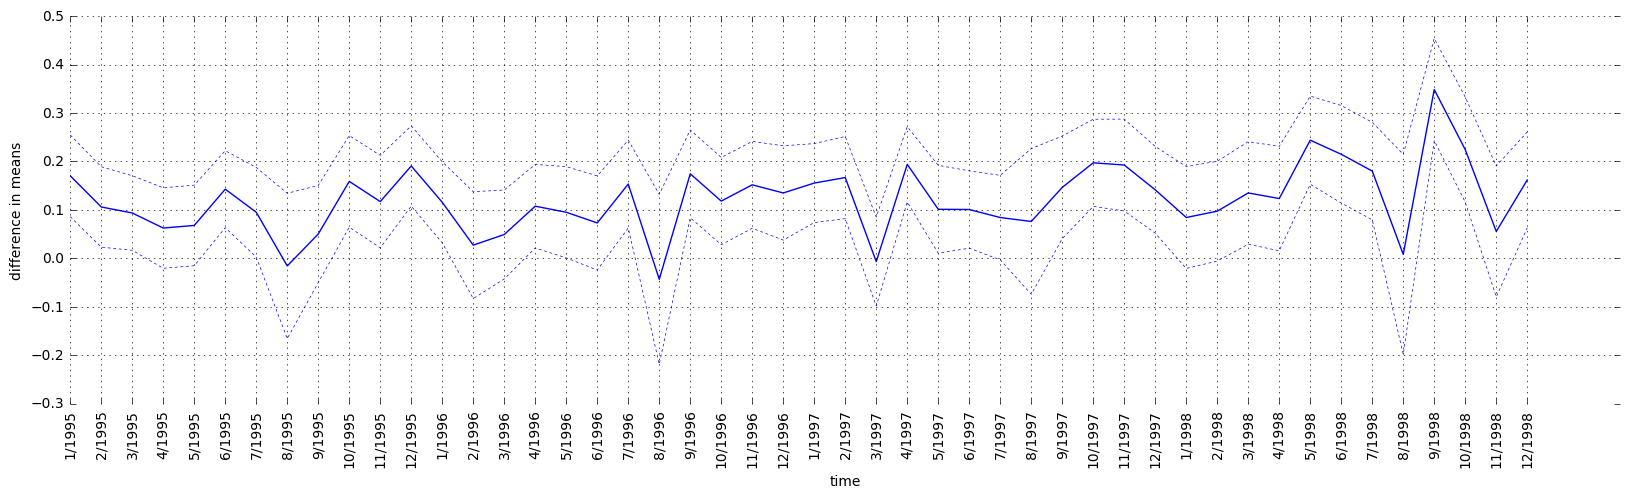

In [163]:
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(20, 5))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.plot(corr)
ax.plot(corr + 1.96 * np.sqrt(var), color = 'blue', linewidth = 0.5, dashes=[2, 2])
ax.plot(corr - 1.96 * np.sqrt(var), color = 'blue', linewidth = 0.5, dashes=[2, 2])
ax.set_xticks(np.arange(0, len(dates), step=1))
ax.set_xlabel('time')
ax.set_ylabel('difference in means')
ax.set_xticklabels(dates, rotation=90)
plt.grid(b=None, which='major', axis='both')
plt.show()

## Partisanship by judge

Treatment: having a different political affiliation than the justice who writes the majority opinion.
Outcome: dissenting.

In [12]:
# political opposition with first judge
first_judge = data[data['judgeopinion']==1]
fj = first_judge[['masterid', 'jpid']].set_index('masterid')
fj.columns = ['firstjpid']

In [13]:
len(first_judge)/len(data['masterid'].unique())

0.8469656054576464

In [14]:
data[data['jpid']==1]['pajid'].quantile(q=[0.05, 0.25,0.5,0.75, 0.95])

0.05    21.90
0.25    39.77
0.50    50.17
0.75    62.45
0.95    86.69
Name: pajid, dtype: float64

In [15]:
data[data['jpid']==2]['pajid'].quantile(q=[0.05, 0.25,0.5,0.75, 0.95])

0.05     2.89
0.25    20.20
0.50    23.63
0.75    25.74
0.95    55.33
Name: pajid, dtype: float64

In [16]:
data[data['jpid']==3]['pajid'].mean()

41.76438140806594

In [17]:
fj.isna().sum()/len(fj)

firstjpid    0.147963
dtype: float64

In [18]:
data2 = pd.merge(data, fj, left_on = 'masterid', right_index = True, how = 'left')

In [19]:
data2.head(2)

,masterid,id_1,coder,coderid,casen_1,juris,first_ct,agency,agency_r,arbitrat,...,agedec,EWI,select,retentn,cj,date,Year,Month,Partisan Conflict,firstjpid
0,95.010009765625,102,TEB,1130,1.0,2.0,1.0,0.0,88.0,0.0,...,66.0,-1.454818,5.0,5.0,0.0,1995-12-01,1995.0,12.0,129.235441,1.0
1,95.01001739501953,103,TEB,1130,2.0,2.0,2.0,0.0,88.0,0.0,...,65.0,-1.454818,5.0,5.0,0.0,1995-12-01,1995.0,12.0,129.235441,1.0


In [20]:
data2 = data2[data2['judgeopinion'] != 1]
data2['opposition'] = (data2['jpid'] != data2['firstjpid'])
data2['dissent'] = (data2['judgeopinion'] != 1) & (data2['judgeopinion'] != 2)

In [21]:
data2 = data2[['dissent', 'opposition', 'date']].dropna(axis = 0)

In [22]:
o = np.array(data2['dissent'])*1
t = np.array(data2['opposition'])*1

In [23]:
def permute(a):
    ind = np.random.permutation(len(a))
    return a[ind]

def diff_means(tr, oc):
    return np.sum(tr * oc)/ np.sum(tr) - np.sum((1-tr) * oc) / np.sum(1-tr)

In [24]:
N = 5000
dm = np.zeros(N)
tdm = diff_means(t, o)
tdm

0.023235577594202805

In [25]:
for i in range(N):
    u = permute(t)
    dm[i] = diff_means(u, o)

In [26]:
sum(dm > tdm)/N

0.0

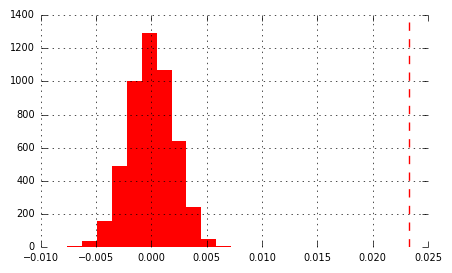

In [27]:
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(5, 3))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.hist(dm, color = 'red', linewidth=0, bins = 12)
ax.axvline(tdm, color='red', linestyle='dashed', linewidth=1)
plt.tick_params(labelsize=7)
plt.grid(b=None, which='major', axis='both')

In [28]:
corr = []
dates = []
varsame = []
vardiff = []
different_parties = []
same_parties = []
political_polarization = []
for year in [1995, 1996, 1997, 1998]:
    for m in range(1, 13):
        d = data2[(data2['date'].dt.month == m) & (data2['date'].dt.year == year)]
        o = np.array(d['dissent'])*1
        t = np.array(d['opposition'])*1
        date = str(m) + '/' + str(year)
        
        #if sum(t)*(sum(t)-1)*sum(1-t)*(sum(1-t)-1) > 0:
        dp = sum(o * t) / sum(t)
        sp = sum(o * (1-t)) / sum(1-t)
        pp = partisan_conflict[(partisan_conflict['Year'] == year) 
                               & (partisan_conflict['Month'] == m)]['Partisan Conflict'].iloc[0]
        vd = np.sum( (o - np.mean(o))**2 * t) / (sum(t)*(sum(t)-1))
        vs = np.sum((o - np.mean(o))**2 * (1-t)) / (sum(1-t)*(sum(1-t)-1))
        #corr.append(dm)
        different_parties.append(dp)
        same_parties.append(sp)
        political_polarization.append(pp)
        dates.append(date) 
        varsame.append(vs)
        vardiff.append(vd)

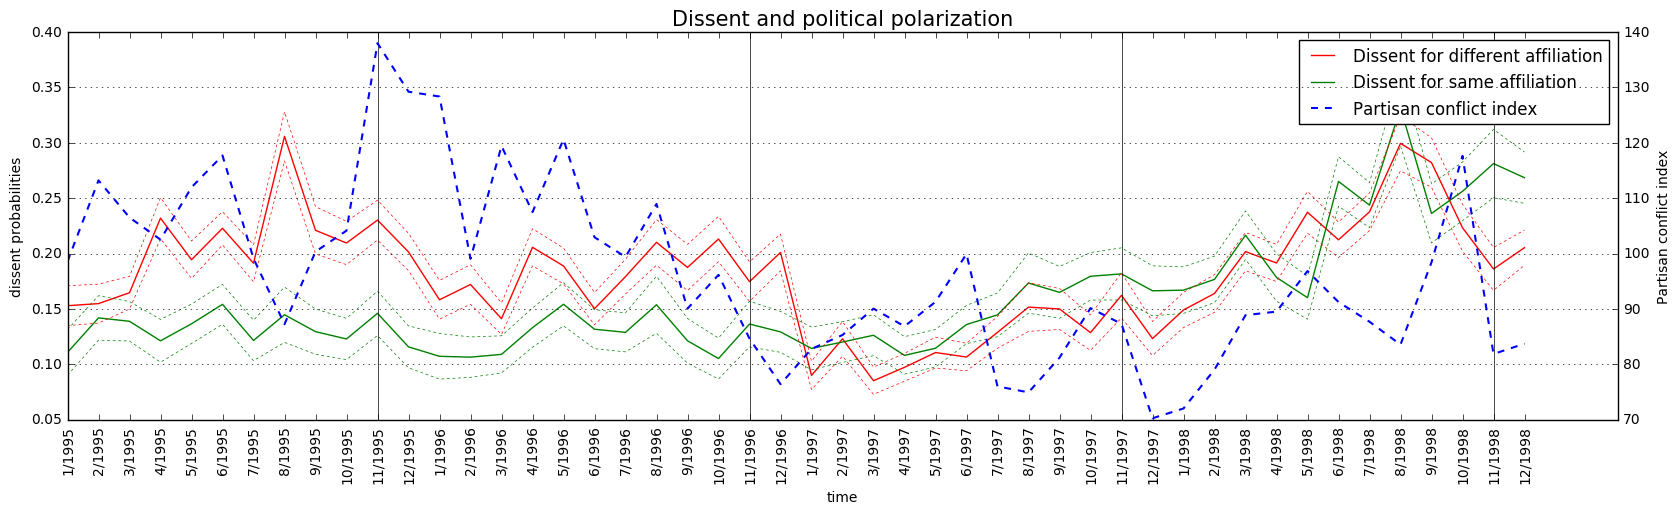

In [29]:
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(20, 5))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 


dfp = ax.plot(different_parties, label = 'Dissent for different affiliation', color = 'red')
smp = ax.plot(same_parties, label = 'Dissent for same affiliation', color = 'green')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
polpol = ax2.plot(political_polarization, color = 'blue', linewidth=1.5, dashes=[5, 5], label = 'Partisan conflict index')

plots = dfp+smp+polpol
labs = [l.get_label() for l in plots]
ax.legend(plots, labs)

ax2.set_ylabel('Partisan conflict index')
ax.plot(different_parties + 1.96 * np.sqrt(vardiff), color = 'red', linewidth = 0.5, dashes=[2, 2])
ax.plot(different_parties - 1.96 * np.sqrt(vardiff), color = 'red', linewidth = 0.5, dashes=[2, 2])
ax.plot(same_parties + 1.96 * np.sqrt(varsame), color = 'green', linewidth = 0.5, dashes=[2, 2])
ax.plot(same_parties - 1.96 * np.sqrt(varsame), color = 'green', linewidth = 0.5, dashes=[2, 2])
ax.set_xticks(np.arange(0, len(dates), step=1))
ax.set_xlabel('time')
ax.set_ylabel('dissent probabilities')
ax.set_xticklabels(dates, rotation=90)
#ax.axhline(tdm, color='red', linestyle='dashed', linewidth=1)
ax.axvline(10, color='k', linewidth=0.5)
ax.axvline(22, color='k', linewidth=0.5)
ax.axvline(34, color='k', linewidth=0.5)
ax.axvline(46, color='k', linewidth=0.5)
plt.grid(b=None, which='major', axis='both')
plt.title('Dissent and political polarization', size = 15)

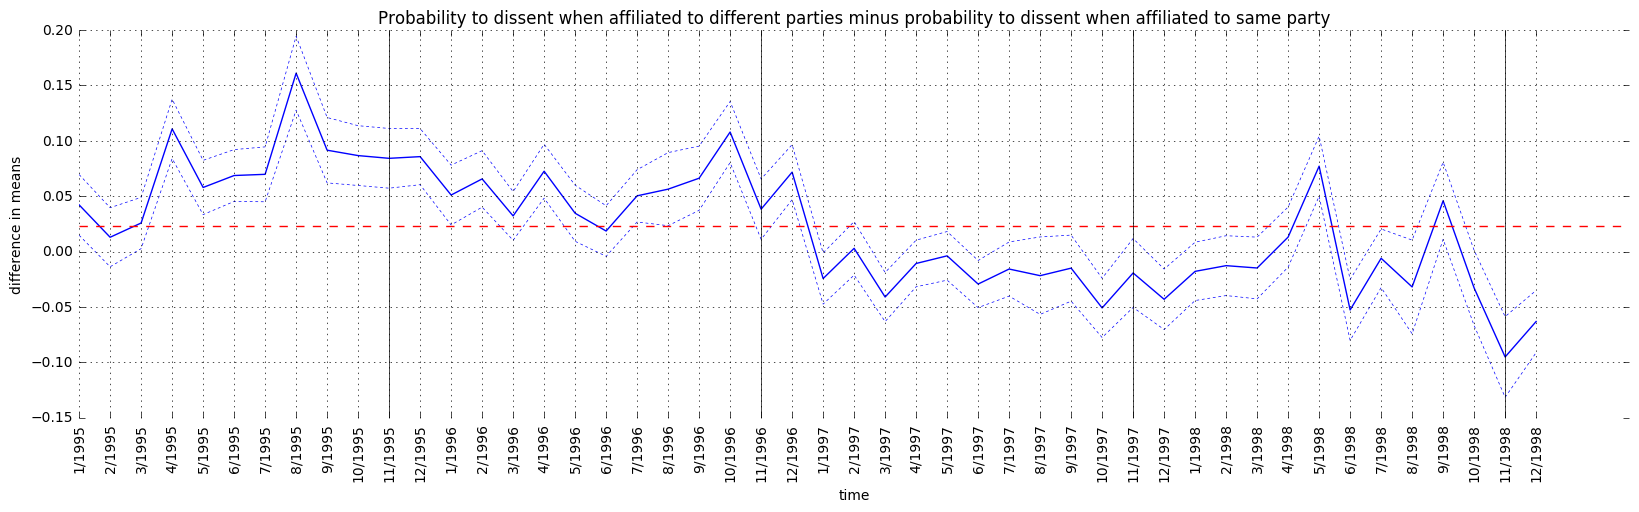

In [404]:
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(20, 5))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.plot(corr)
ax.plot(corr + 1.96 * np.sqrt(var), color = 'blue', linewidth = 0.5, dashes=[2, 2])
ax.plot(corr - 1.96 * np.sqrt(var), color = 'blue', linewidth = 0.5, dashes=[2, 2])
ax.set_xticks(np.arange(0, len(dates), step=1))
ax.set_xlabel('time')
ax.set_ylabel('difference in means')
ax.set_xticklabels(dates, rotation=90)
ax.axhline(tdm, color='red', linestyle='dashed', linewidth=1)
ax.axvline(10, color='k', linewidth=0.5)
ax.axvline(22, color='k', linewidth=0.5)
ax.axvline(34, color='k', linewidth=0.5)
ax.axvline(46, color='k', linewidth=0.5)
plt.grid(b=None, which='major', axis='both')
plt.title('Probability to dissent when affiliated to different parties minus probability to dissent when affiliated to same party')

In [405]:
corr = []
dates = []
var = []
for year in [1995, 1996, 1997, 1998]:
    for m in range(1, 13):
        d = data2[(data2['date'].dt.month == m) & (data2['date'].dt.year == year)]
        o = np.array(d['dissent'])*1
        t = np.array(d['opposition'])*1
        date = str(m) + '/' + str(year)
        
        #if sum(t)*(sum(t)-1)*sum(1-t)*(sum(1-t)-1) > 0:
        dm = sum(o * t) / sum(t) #- sum(o * (1-t)) / sum(1-t)
        v = np.sum( (o - np.mean(o))**2 * t) / (sum(t)*(sum(t)-1)) + np.sum((o - np.mean(o))**2 * (1-t)) / (sum(1-t)*(sum(1-t)-1))
        corr.append(dm)
        dates.append(date) 
        var.append(v)

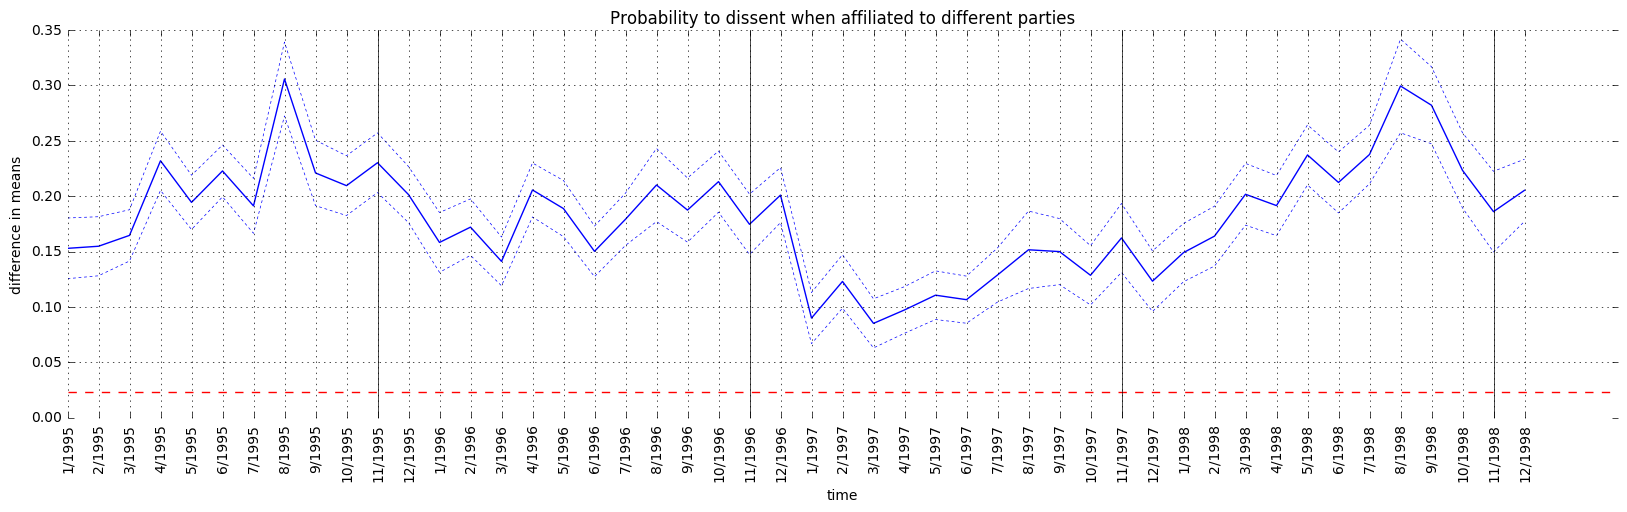

In [406]:
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(20, 5))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.plot(corr)
ax.plot(corr + 1.96 * np.sqrt(var), color = 'blue', linewidth = 0.5, dashes=[2, 2])
ax.plot(corr - 1.96 * np.sqrt(var), color = 'blue', linewidth = 0.5, dashes=[2, 2])
ax.set_xticks(np.arange(0, len(dates), step=1))
ax.set_xlabel('time')
ax.set_ylabel('difference in means')
ax.set_xticklabels(dates, rotation=90)
#ax.axhline(tdm, color='red', linestyle='dashed', linewidth=1)
ax.axvline(10, color='k', linewidth=0.5)
ax.axvline(22, color='k', linewidth=0.5)
ax.axvline(34, color='k', linewidth=0.5)
ax.axvline(46, color='k', linewidth=0.5)
plt.grid(b=None, which='major', axis='both')
plt.title('Probability to dissent when affiliated to different parties')

In [409]:
corr = []
dates = []
var = []
for year in [1995, 1996, 1997, 1998]:
    for m in range(1, 13):
        d = data2[(data2['date'].dt.month == m) & (data2['date'].dt.year == year)]
        o = np.array(d['dissent'])*1
        t = np.array(d['opposition'])*1
        date = str(m) + '/' + str(year)
        
        #if sum(t)*(sum(t)-1)*sum(1-t)*(sum(1-t)-1) > 0:
        dm = sum(o * (1-t)) / sum(1-t)
        v = np.sum( (o - np.mean(o))**2 * t) / (sum(t)*(sum(t)-1)) + np.sum((o - np.mean(o))**2 * (1-t)) / (sum(1-t)*(sum(1-t)-1))
        corr.append(dm)
        dates.append(date) 
        var.append(v)

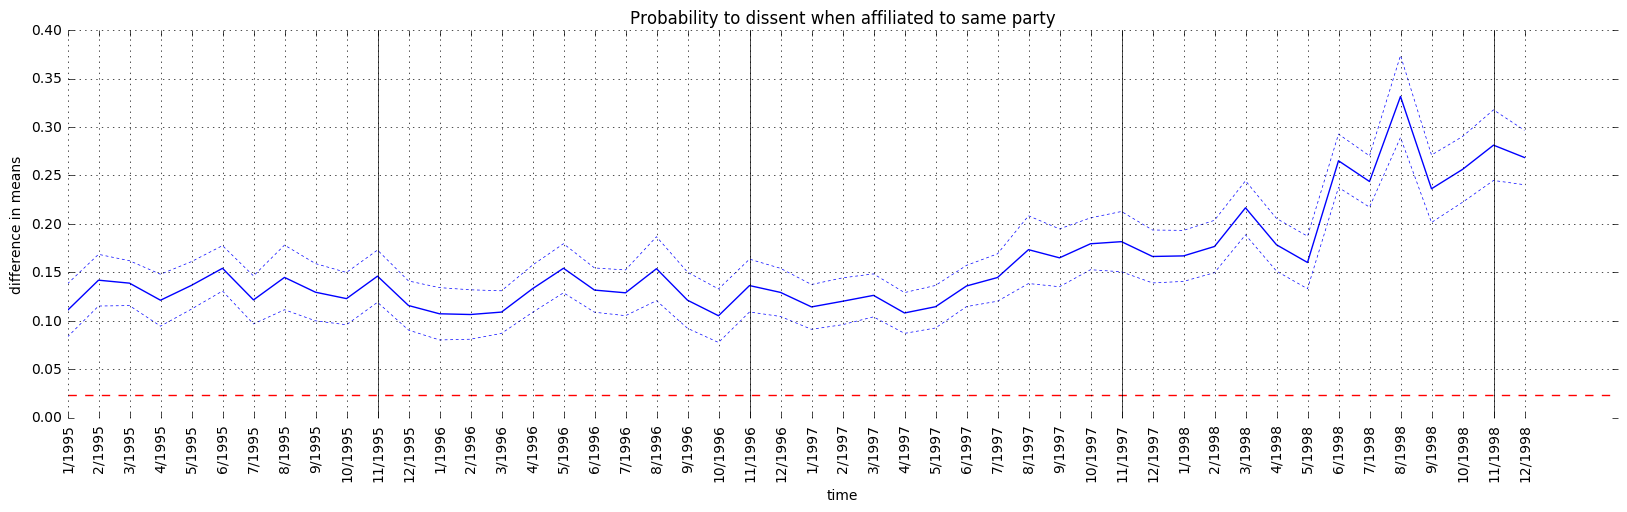

In [410]:
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(20, 5))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.plot(corr)
ax.plot(corr + 1.96 * np.sqrt(var), color = 'blue', linewidth = 0.5, dashes=[2, 2])
ax.plot(corr - 1.96 * np.sqrt(var), color = 'blue', linewidth = 0.5, dashes=[2, 2])
ax.set_xticks(np.arange(0, len(dates), step=1))
ax.set_xlabel('time')
ax.set_ylabel('difference in means')
ax.set_xticklabels(dates, rotation=90)
#ax.axhline(tdm, color='red', linestyle='dashed', linewidth=1)
ax.axvline(10, color='k', linewidth=0.5)
ax.axvline(22, color='k', linewidth=0.5)
ax.axvline(34, color='k', linewidth=0.5)
ax.axvline(46, color='k', linewidth=0.5)
plt.grid(b=None, which='major', axis='both')
plt.title('Probability to dissent when affiliated to same party')

# Partisan conflict index

### Permutation tests

Hypothesis testing: for different political affiliations only
- $H_0:$ the mean political polarization index conditional on dissent is equal to the mean
- $H_1:$ the mean political polarization index conditional on dissent is higher than the mean

In [446]:
first_judge = data[data['judgeopinion']==1]
fj = first_judge[['masterid', 'jpid']].set_index('masterid')
fj.columns = ['firstjpid']

In [447]:
data2 = pd.merge(data, fj, left_on = 'masterid', right_index = True, how = 'left')

In [448]:
data2 = data2[data2['judgeopinion'] != 1]
data2['opposition'] = (data2['jpid'] != data2['firstjpid'])
data2['dissent'] = (data2['judgeopinion'] != 1) & (data2['judgeopinion'] != 2)

In [449]:
data_opp = data2[data2['opposition'] == True] # keep only different political affiliations
outcome = data_opp['dissent']
treatment = data_opp['Partisan Conflict']
o = np.array(outcome)*1
t = np.array(treatment)*1

In [336]:
len(outcome), len(treatment)

(91748, 91748)

In [450]:
def stat(o, t):
    return sum(o*t) / len(o)

In [457]:
N = 5000
opp_stat_perm = np.zeros(N)
s = stat(o, t)
s

17.76936113436507

In [458]:
for i in range(N):
    u = permute(t)
    opp_stat_perm[i] = stat(o, u)

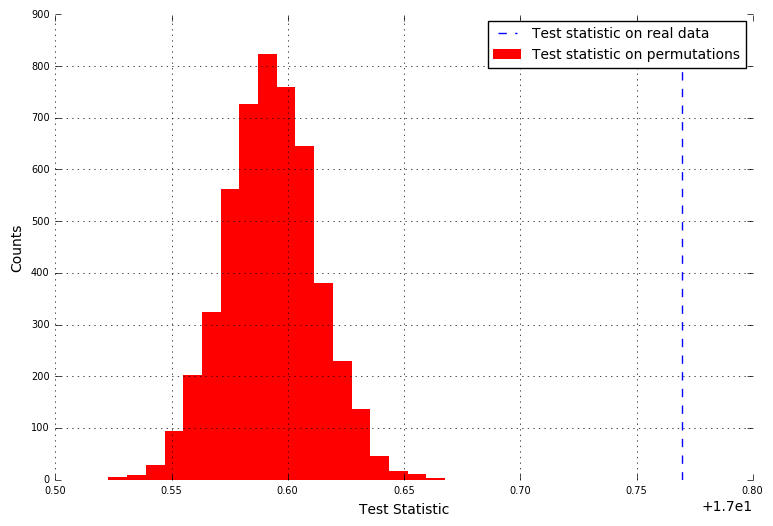

In [459]:
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(9, 6))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.hist(opp_stat_perm, color = 'red', linewidth=0, bins = 18, label = 'Test statistic on permutations')
ax.axvline(s, color='blue', linestyle='dashed', linewidth=1, label = 'Test statistic on real data')
ax.set_xlabel('Test Statistic')
ax.set_ylabel('Counts')
plt.tick_params(labelsize=7)
plt.grid(b=None, which='major', axis='both')
plt.legend(fontsize = 10)

Hypothesis testing: for same political affiliations only
- $H_0:$ the mean political polarization index conditional on dissent is equal to the mean
- $H_1:$ the mean political polarization index conditional on dissent is lower than the mean

In [460]:
data_nopp = data2[data2['opposition'] == False] # keep only different political affiliations
outcome = data_nopp['dissent']
treatment = data_nopp['Partisan Conflict']
o = np.array(outcome)*1
t = np.array(treatment)*1

In [461]:
nopp_stat_perm = np.zeros(N)
s = stat(o, t)
s

15.069107493579885

In [462]:
for i in range(N):
    u = permute(t)
    nopp_stat_perm[i] = stat(o, u)

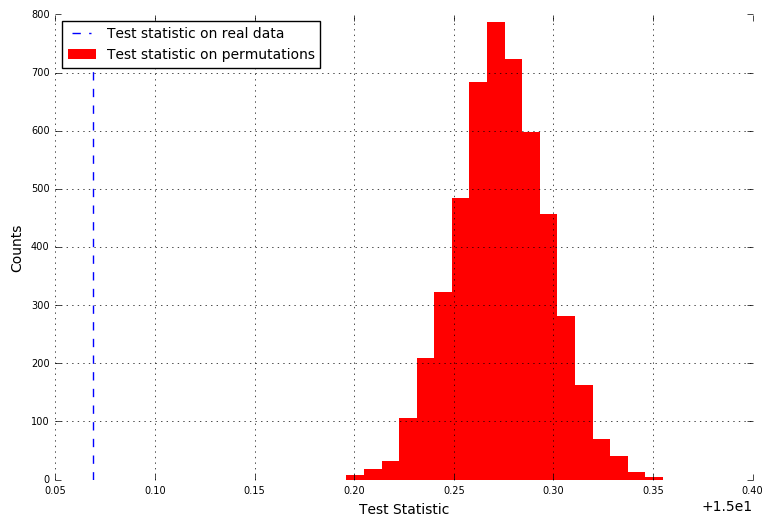

In [464]:
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(9, 6))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.hist(nopp_stat_perm, color = 'red', linewidth=0, bins = 18, label = 'Test statistic on permutations')
ax.axvline(s, color='blue', linestyle='dashed', linewidth=1, label = 'Test statistic on real data')
ax.set_xlabel('Test Statistic')
ax.set_ylabel('Counts')
plt.tick_params(labelsize=7)
plt.grid(b=None, which='major', axis='both')
plt.legend(fontsize = 10, loc = 0)

### Logistic Regression

In [521]:
y = data_opp['dissent']
x = data_opp[['Partisan Conflict']] #, 'gender', 'EWI', 'jpid', 'pajid', 'agedec', 'select', 'cj']]
x = x.fillna(0)
x = (x - x.mean()) / x.std()

In [520]:
import statsmodels.api as sm
lr = sm.Logit(y, x).fit()
lr.params, lr.bse

Optimization terminated successfully.
         Current function value: 0.692552
         Iterations 4


(Partisan Conflict    0.044941
 race                 0.052613
 dtype: float64, Partisan Conflict    0.006610
 race                 0.006642
 dtype: float64)

In [502]:
judge_vars=['judgecode', 'brthyr','race', 'gender','pajid','jpid', 'agedec', 'EWI', 'select', 'retentn', 'cj']

In [522]:
y = data_nopp['dissent']
x = data_nopp[['Partisan Conflict']] #, 'gender', 'EWI', 'jpid', 'pajid', 'agedec', 'select', 'cj']]
x = x.fillna(0)
x = (x - x.mean()) / x.std()

In [523]:
lr = sm.Logit(y, x).fit()
lr.params, lr.bse

Optimization terminated successfully.
         Current function value: 0.692789
         Iterations 3


(Partisan Conflict   -0.053533
 dtype: float64, Partisan Conflict    0.008374
 dtype: float64)

## Homogeneity of majorities

In [531]:
maj = data[(data['judgeopinion']==1) | (data['judgeopinion']==2)]

In [600]:
majdis = data.groupby('masterid').apply(lambda x : 6 in x['judgeopinion'].unique())

In [601]:
len(majdis[majdis]) / len(majdis)

0.16284110289937465

In [602]:
maj = maj.set_index('masterid')

In [527]:
maj['jpid'] = maj['jpid'].fillna(5)

/Users/delphine/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [605]:
maj = maj.loc[majdis]

In [606]:
idx = maj.groupby('masterid').apply(lambda x : len(x['jpid'].dropna().unique()))

In [607]:
idx = idx[majdis > 0]

In [611]:
len(idx[idx > 1])

2775

In [612]:
idx[idx == 2]

masterid
95.01011657714844    2
95.01197814941406    2
95.02021026611328    2
95.02044677734375    2
95.02056884765625    2
95.0206527709961     2
95.02098083496094    2
95.02104187011719    2
95.02114868164062    2
95.030029296875      2
95.03015899658203    2
95.03019714355469    2
95.03022766113281    2
95.03031921386719    2
95.03034210205078    2
95.03034973144531    2
95.03038024902344    2
95.03058624267578    2
95.05008697509766    2
95.05010223388672    2
95.0501480102539     2
95.05034637451172    2
95.0503921508789     2
95.05052947998047    2
95.05058288574219    2
95.05062866210938    2
95.05068969726562    2
95.05085754394531    2
95.05101013183594    2
95.06001281738281    2
                    ..
98.48149871826172    2
98.48164367675781    2
98.481689453125      2
98.4818115234375     2
98.48182678222656    2
98.48194122314453    2
98.4819564819336     2
98.49022674560547    2
98.49024200439453    2
98.4902572631836     2
98.49037170410156    2
98.4903793334961     2
98

In [565]:
idx = idx[idx == 2]

In [587]:
maj[maj['masterid'] == idx.index[8]]['jpid']

37441    NaN
38114    2.0
38787    1.0
39467    NaN
Name: jpid, dtype: float64

In [588]:
maj[maj['masterid'] == idx.index[8]]['judgecode']

37441    118.0
38114    117.0
38787    114.0
39467    115.0
Name: judgecode, dtype: float64

In [579]:
data[data['masterid'] == idx.index[0]]['jpid']

11240    1.0
11847    2.0
12455    1.0
13053    1.0
13649    1.0
14203    1.0
14572    1.0
Name: jpid, dtype: float64

In [580]:
data[data['masterid'] == idx.index[0]]['_jposition']

11240    1.0
11847    2.0
12455    3.0
13053    4.0
13649    5.0
14203    6.0
14572    7.0
Name: _jposition, dtype: float64

In [589]:
len(maj['masterid'].unique())

27608

In [590]:
len(data['masterid'].unique())

28144

In [593]:
maj = data.dropna(subset = ['jpid'], axis = 0)

In [594]:
maj = maj[(maj['judgeopinion']==1) | (maj['judgeopinion']==2)]

In [595]:
majdis = data.groupby('masterid').apply(lambda x : len(x['judgeopinion'].unique()) > 2)

In [598]:
majdis

masterid
95.010009765625      False
95.01001739501953    False
95.0100326538086      True
95.01004028320312     True
95.01004791259766    False
95.01006317138672    False
95.01007080078125    False
95.01007843017578     True
95.01009368896484    False
95.01010131835938     True
95.0101089477539     False
95.01011657714844     True
95.0101318359375     False
95.01013946533203    False
95.01014709472656    False
95.01016235351562    False
95.01016998291016     True
95.01017761230469    False
95.01019287109375    False
95.01020050048828     True
95.01020812988281    False
95.01022338867188     True
95.0102310180664     False
95.01023864746094     True
95.01024627685547    False
95.01026153564453    False
95.01026916503906    False
95.0102767944336      True
95.01029205322266     True
95.01029968261719     True
                     ...  
98.50138854980469    False
98.50140380859375    False
98.50141143798828    False
98.50141906738281    False
98.50142669677734    False
98.5014419555664   

In [654]:
oo = data.groupby('masterid').apply(lambda x: 6 in x['judgeopinion'].unique())

In [655]:
oo.head()

masterid
95.010009765625      False
95.01001739501953    False
95.0100326538086      True
95.01004028320312     True
95.01004791259766    False
dtype: bool

In [656]:
data[data['masterid']==oo.index[2]][['judgeopinion', 'judgevote']]

,judgeopinion,judgevote
3818,2,1
4299,2,1
4774,2,1
5251,2,1
5718,2,1
6160,6,2
6427,7,2


In [657]:
oov = data.groupby('masterid').apply(lambda x: len(x['judgevote'].unique()))

In [661]:
mm = pd.DataFrame({'opinion' : 1*oo + 1, 'vote' : oov})

In [663]:
mm = mm[mm['vote'] != mm['opinion']]

In [670]:
data[data['masterid'] == mm.index[6]][['judgevote','judgeopinion']]

,judgevote,judgeopinion
21292,1,1
21864,1,2
22451,1,2
23040,1,2
23611,1,2
24121,2,9
24460,2,9


### Case level mutual information

In [1007]:
dd = data[['masterid', 'date', 'state_2', 'judgevote', 'jpid']]
dd = pd.get_dummies(dd, columns = ['judgevote', 'jpid'])
dd_count= dd.groupby(['date', 'state_2', 'masterid']).size()
dd_count.head()

date        state_2  masterid         
1995-01-03  7        95.07144927978516    7
                     95.07147216796875    6
            12       95.12116241455078    5
            42       95.4209213256836     5
1995-01-04  8        95.08059692382812    5
dtype: int64

In [1008]:
dd

,masterid,date,state_2,judgevote_1,judgevote_2,judgevote_88,jpid_1.0,jpid_2.0,jpid_3.0
0,95.010009765625,1995-12-01,1,0,1,0,1,0,0
1,95.01001739501953,1995-12-01,1,1,0,0,1,0,0
2,95.01006317138672,1995-12-01,1,0,1,0,1,0,0
3,95.01007080078125,1995-12-01,1,1,0,0,1,0,0
4,95.01016235351562,1995-12-22,1,0,1,0,0,1,0
5,95.01043701171875,1995-12-22,1,1,0,0,1,0,0
6,95.01061248779297,1995-12-22,1,0,1,0,1,0,0
7,95.01068115234375,1995-12-01,1,0,1,0,1,0,0
8,95.01172637939453,1995-12-01,1,1,0,0,0,1,0
9,95.0117416381836,1995-12-01,1,0,1,0,1,0,0


In [1001]:
dd=dd.set_index(['date', 'state_2', 'masterid'])
dd['jpid_nan'] = 1 * (dd['jpid_1.0'] + dd['jpid_2.0'] + dd['jpid_3.0'] == 0)

In [1002]:
dd.head()

judgevote_1  judgevote_2  judgevote_88  \
date       state_2 masterid                                                    
1995-12-01 1       95.010009765625              0            1             0   
                   95.01001739501953            1            0             0   
                   95.01006317138672            0            1             0   
                   95.01007080078125            1            0             0   
1995-12-22 1       95.01016235351562            0            1             0   

                                      jpid_1.0  jpid_2.0  jpid_3.0  jpid_nan  
date       state_2 masterid                                                   
1995-12-01 1       95.010009765625           1         0         0         0  
                   95.01001739501953         1         0         0         0  
                   95.01006317138672         1         0         0         0  
                   95.01007080078125         1         0         0         0  
1995-12-22 1       95.01016235351562         0         1         0         0

In [1003]:
dd = dd+epsilon

In [1004]:
for i in ['judgevote_1', 'judgevote_2', 'judgevote_88']:
    for j in ['jpid_1.0', 'jpid_2.0', 'jpid_3.0', 'jpid_nan']:
        dd[i+j] = dd[i] * dd[j]

In [1005]:
# judge opinion distribution
dd1 = dd.groupby(['date', 'state_2', 'masterid']).sum()
#dd1 = dd1[(dd1['judgevote_1'] > epsilon) & (dd1['judgevote_2'] > epsilon*9)]
dd1 = dd1.divide(dd_count * (1 + epsilon), axis = 0)

In [1006]:
dd1

judgevote_1  judgevote_2  judgevote_88  \
date       state_2 masterid                                                    
1995-01-03 7       95.07144927978516     0.009901     1.000000      0.009901   
                   95.07147216796875     0.174917     0.834983      0.009901   
           12      95.12116241455078     0.009901     1.000000      0.009901   
           42      95.4209213256836      1.000000     0.009901      0.009901   
1995-01-04 8       95.08059692382812     0.009901     1.000000      0.009901   
           14      95.14005279541016     1.000000     0.009901      0.009901   
           16      95.1600112915039      0.009901     1.000000      0.009901   
           19      95.19013977050781     1.000000     0.009901      0.009901   
           39      95.39164733886719     1.000000     0.009901      0.009901   
           41      95.4100112915039      0.009901     1.000000      0.009901   
                   95.41001892089844     0.009901     1.000000      0.009901   
                   95.41004943847656     0.009901     1.000000      0.009901   
                   95.41008758544922     0.207921     0.801980      0.009901   
1995-01-05 9       95.0909423828125      0.876238     0.133663      0.009901   
                   95.09095001220703     0.009901     1.000000      0.009901   
                   95.09095764160156     0.151344     0.858557      0.009901   
                   95.09195709228516     1.000000     0.009901      0.009901   
                   95.09197235107422     0.133663     0.876238      0.009901   
                   95.09197998046875     1.000000     0.009901      0.009901   
                   95.09198760986328     0.009901     1.000000      0.009901   
           30      95.30098724365234     0.009901     1.000000      0.009901   
           47      95.47000885009766     0.876238     0.133663      0.009901   
           50      95.5000228881836      0.009901     1.000000      0.009901   
1995-01-06 12      95.1200180053711      0.009901     1.000000      0.009901   
           23      95.23004150390625     1.000000     0.009901      0.009901   
                   95.2300796508789      1.000000     0.009901      0.009901   
                   95.23014831542969     1.000000     0.009901      0.009901   
           27      95.27001190185547     0.009901     1.000000      0.009901   
                   95.27001953125        1.000000     0.009901      0.009901   
                   95.2700424194336      0.009901     1.000000      0.009901   
...                                           ...          ...           ...   
1998-12-31 27      98.27192687988281     1.000000     0.009901      0.009901   
                   98.27194213867188     1.000000     0.009901      0.009901   
           28      98.28125762939453     0.009901     1.000000      0.009901   
                   98.2812728881836      0.504950     0.504950      0.009901   
                   98.28131103515625     0.801980     0.207921      0.009901   
                   98.28135681152344     0.801980     0.207921      0.009901   
           29      98.29086303710938     1.000000     0.009901      0.009901   
                   98.29090881347656     0.009901     1.000000      0.009901   
                   98.29094696044922     1.000000     0.009901      0.009901   
           33      98.3307113647461      0.009901     1.000000      0.009901   
                   98.33071899414062     1.000000     0.009901      0.009901   
                   98.33072662353516     1.000000     0.009901      0.009901   
                   98.33074188232422     0.339934     0.669967      0.009901   
                   98.33074951171875     0.009901     1.000000      0.009901   
                   98.33075714111328     0.009901     1.000000      0.009901   
                   98.33077239990234     0.009901     1.000000      0.009901   
                   98.33078002929688     0.009901     1.000000      0.009901   
           36      98.36062622070312  

In [982]:
epsilon = 0.01
#dd1 = dd1+epsilon

In [983]:
def mutual_info(dd1):
    mi = np.zeros(len(dd1))
    for i in ['judgevote_1', 'judgevote_2', 'judgevote_88']: 
        for j in ['jpid_1.0', 'jpid_2.0', 'jpid_3.0', 'jpid_nan']:
            mi += dd1[i+j] * np.log(dd1[i+j] / (dd1[i]* dd1[j]))
    return mi

In [984]:
mi = mutual_info(dd1).reset_index()

In [985]:
mi.columns = ['date', 'state', 'id', 'mi']

In [986]:
mi.head()

,date,state,id,mi
0,1995-01-03,7,95.07147216796875,-11.362196
1,1995-01-04,41,95.41008758544922,-8.418897
2,1995-01-05,9,95.0909423828125,-17.581192
3,1995-01-05,9,95.09095764160156,-13.307547
4,1995-01-05,9,95.09197235107422,-16.423777


In [987]:
mii = []
vmi = []
dates = []
for year in [1995, 1996, 1997, 1998]:
    for m in range(1, 13):
        d = mi[(mi['date'].dt.month == m) & (mi['date'].dt.year == year)]

        date = str(m) + '/' + str(year)
        
        mii.append(d['mi'].mean())
        vmi.append(d['mi'].std())
        dates.append(date) 

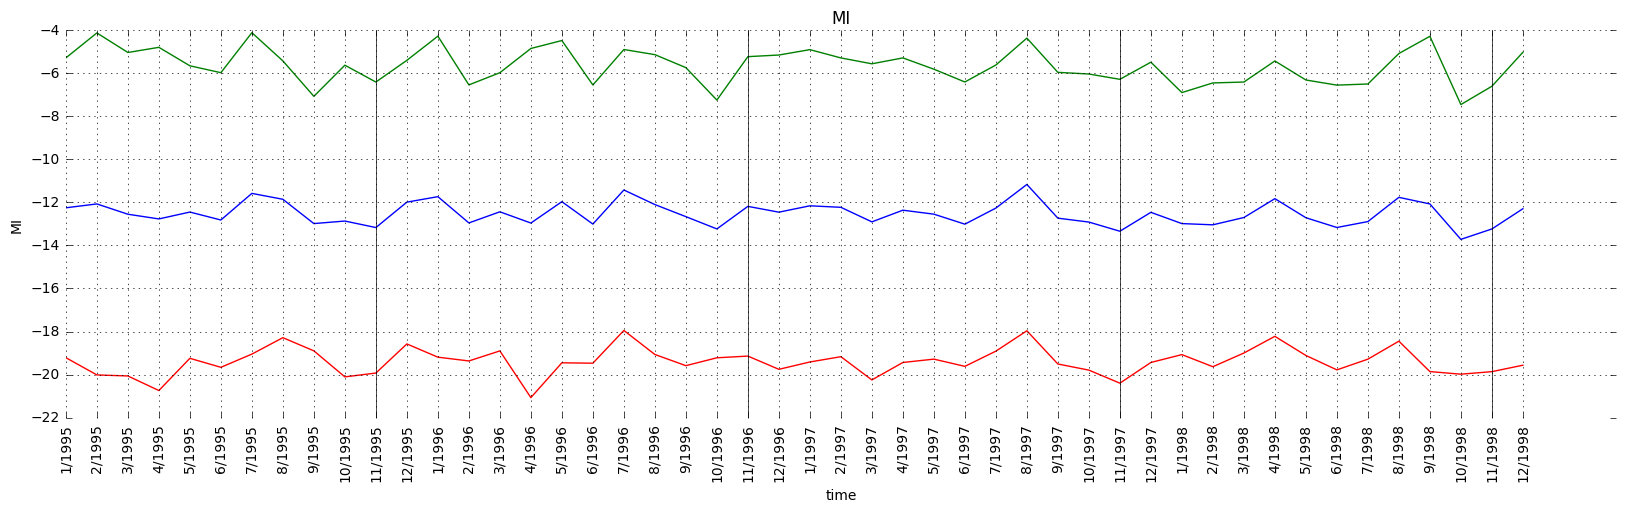

In [988]:
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(20, 5))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.plot(mii)
ax.plot(mii + 1.96 * np.array(vmi))
ax.plot(mii - 1.96 * np.array(vmi))

ax.set_xticks(np.arange(0, len(dates), step=1))
ax.set_xlabel('time')
ax.set_ylabel('MI')
ax.set_xticklabels(dates, rotation=90)
#ax.axhline(tdm, color='red', linestyle='dashed', linewidth=1)
ax.axvline(10, color='k', linewidth=0.5)
ax.axvline(22, color='k', linewidth=0.5)
ax.axvline(34, color='k', linewidth=0.5)
ax.axvline(46, color='k', linewidth=0.5)
plt.grid(b=None, which='major', axis='both')
plt.title('MI')

## Pair of judge on panel level

In [247]:
codes = data[['date', 'masterid', 'judgecode']]

In [248]:
codes = codes[codes['judgecode'] != 88]

In [249]:
datac = data[['date', 'masterid', 'judgecode', 'jpid', 'judgeopinion']]

In [250]:
datac = datac[(datac['judgeopinion'] != 55) & (datac['judgeopinion'] != 88) & (datac['judgeopinion'] != 12)]

In [251]:
datac['judgeopinion'] = datac['judgeopinion'].map({1:1, 2 : 1, 3:6, 4:6, 5:6, 6:6, 7:6, 8:6, 9:6, 10:1, 11:6})

In [252]:
datac.head()

,date,masterid,judgecode,jpid,judgeopinion
0,1995-12-01,95.010009765625,107.0,1.0,1.0
1,1995-12-01,95.01001739501953,109.0,1.0,1.0
2,1995-12-01,95.01006317138672,107.0,1.0,1.0
3,1995-12-01,95.01007080078125,102.0,1.0,1.0
4,1995-12-22,95.01016235351562,112.0,2.0,1.0


In [253]:
from itertools import combinations

In [254]:
pairs = codes.groupby(['date', 'masterid'])['judgecode'].apply(
    lambda x : pd.DataFrame(list(combinations(x.values, 2)), columns = ['jA', 'jB'])) #.apply(pd.Series).stack()

In [255]:
pairs = pairs.reset_index()

In [256]:
pairs.drop('level_2', axis = 1, inplace = True)

In [257]:
pairs.columns = ['date', 'masterid', 'judgecode', 'jB']

In [258]:
pairs = pairs.set_index(['date', 'masterid', 'judgecode'])
datac = datac.set_index(['date', 'masterid', 'judgecode'])

In [259]:
pairs = pd.merge(pairs, datac, left_index = True, right_index = True, how = 'inner')

In [260]:
pairs.head()

jB  jpid  judgeopinion
date       masterid          judgecode                           
1995-01-03 95.07144927978516 155.0      161.0   NaN           1.0
                             156.0      155.0   1.0           1.0
                             156.0      161.0   1.0           1.0
                             157.0      162.0   1.0           1.0
                             157.0      156.0   1.0           1.0

In [262]:
pairs.columns = ['jB', 'jpidA', 'jopinionA']

In [263]:
pairs.reset_index(inplace = True)

In [264]:
pairs.head()

,date,masterid,judgecode,jB,jpidA,jopinionA
0,1995-01-03,95.07144927978516,155.0,161.0,NaN,1.0
1,1995-01-03,95.07144927978516,156.0,155.0,1.0,1.0
2,1995-01-03,95.07144927978516,156.0,161.0,1.0,1.0
3,1995-01-03,95.07144927978516,157.0,162.0,1.0,1.0
4,1995-01-03,95.07144927978516,157.0,156.0,1.0,1.0


In [265]:
pairs.columns = ['date', 'masterid', 'j1', 'judgecode', 'jpidA', 'jopinionA']

In [266]:
pairs = pairs.set_index(['date', 'masterid', 'judgecode'])

In [267]:
pairs = pd.merge(pairs, datac, left_index = True, right_index = True, how = 'inner')

In [268]:
pairs.reset_index(inplace = True)

In [269]:
pairs.head()

,date,masterid,judgecode,j1,jpidA,jopinionA,jpid,judgeopinion
0,1995-01-03,95.07144927978516,155.0,156.0,1.0,1.0,NaN,1.0
1,1995-01-03,95.07144927978516,155.0,157.0,1.0,1.0,NaN,1.0
2,1995-01-03,95.07144927978516,155.0,162.0,NaN,1.0,NaN,1.0
3,1995-01-03,95.07144927978516,156.0,157.0,1.0,1.0,1.0,1.0
4,1995-01-03,95.07144927978516,156.0,162.0,NaN,1.0,1.0,1.0


In [270]:
pairs.columns = ['date', 'masterid', 'jB', 'jA', 'jpidA', 'jopinionA', 'jpidB', 'jopinionB']

In [271]:
pairs = pairs.dropna(axis = 0)

In [272]:
pairs = pairs[pairs['jpidA'] != pairs['jpidB']]

In [273]:
pairs.shape

(137786, 8)

In [274]:
pairs['nagree'] = (pairs['jopinionA'] != pairs['jopinionB'])

In [281]:
pairs[pairs['nagree']].head(5)

,date,masterid,jB,jA,jpidA,jopinionA,jpidB,jopinionB,nagree
62,1995-01-04,95.14005279541016,217.0,213.0,2.0,6.0,1.0,1.0,True
63,1995-01-04,95.14005279541016,217.0,215.0,2.0,6.0,1.0,1.0,True
66,1995-01-04,95.14005279541016,218.0,213.0,2.0,6.0,1.0,1.0,True
68,1995-01-04,95.14005279541016,218.0,215.0,2.0,6.0,1.0,1.0,True
142,1995-01-05,95.0909423828125,174.0,173.0,1.0,1.0,2.0,6.0,True


In [279]:
diff_pol_nagree_prob = []
n_pairss = []
dates = []
for year in [1995, 1996, 1997, 1998]:
    for m in range(1, 13):
        diff_pol_pairs = pairs[(pairs['date'].dt.month == m) & (pairs['date'].dt.year == year)]
        
        n_pairs = len(diff_pol_pairs)
        n_nagree = sum(diff_pol_pairs['nagree'])
        
        diff_pol_nagree_prob.append(n_nagree / n_pairs)
        
        n_pairss.append(n_pairs)
        
        date = str(m) + '/' + str(year)                                                                              
        dates.append(date) 

In [ ]:
# pairs with different political affiliation disagree 12.4% of the time

In [277]:
sum(pairs['nagree'])/len(pairs)

0.18147707314240924

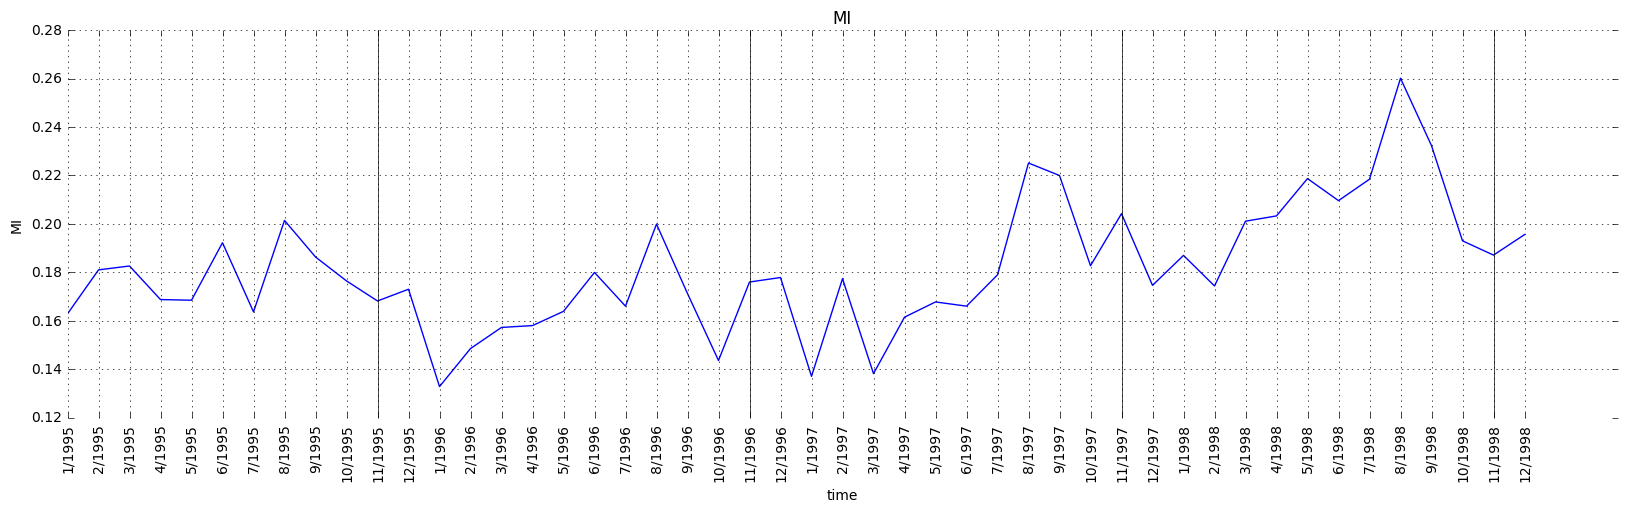

In [280]:
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(20, 5))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
#ax.plot(n_pairss)
ax.plot(diff_pol_nagree_prob)
ax.set_xticks(np.arange(0, len(dates), step=1))
ax.set_xlabel('time')
ax.set_ylabel('MI')
ax.set_xticklabels(dates, rotation=90)
#ax.axhline(tdm, color='red', linestyle='dashed', linewidth=1)
ax.axvline(10, color='k', linewidth=0.5)
ax.axvline(22, color='k', linewidth=0.5)
ax.axvline(34, color='k', linewidth=0.5)
ax.axvline(46, color='k', linewidth=0.5)
plt.grid(b=None, which='major', axis='both')
plt.title('MI')